In [1]:
import tensorflow as tf 
from tensorflow.keras.optimizers import Adam


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import pickle
import os

import seaborn as sns

In [2]:
from tensorflow.keras.applications import ResNet50V2, DenseNet201, InceptionV3, EfficientNetB0
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import  Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from keras.preprocessing.image import ImageDataGenerator

import pickle

In [3]:
x_train = np.load('Created_NPY/train/Btrain_images.npy')
y_train = np.load('Created_NPY/train/Btrain_labels.npy')

x_val = np.load('Created_NPY/val/val_images.npy')
y_val = np.load('Created_NPY/val/val_labels.npy')

x_test = np.load('Created_NPY/test/Btest_images.npy')
y_test = np.load('Created_NPY/test/Btest_labels.npy')

In [4]:
classes = ["COVID", "NORMAL", "PNEUMONIA"]

image_size = 224

path = 'New_Model/'

In [5]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(2111, 224, 224, 3)
(304, 224, 224, 3)
(603, 224, 224, 3)


In [8]:
def train_model(path, train_images=None, train_labels = None, 
                test_images = None, test_labels = None, 
                model_name = None, epochs =30,
                input_shape = (224,224,3), classes=3, batch_size = 8, 
                classifier_activation='softmax',
                callbacks = None):

    base_model = None

    if model_name == 'resnet50v2':
        base_model = ResNet50V2(weights = None, include_top = False, input_shape = input_shape)
                
    if model_name == 'densenet201':        
        base_model = DenseNet201(weights = None, include_top = False, input_shape = input_shape)
          
    if model_name == 'inceptionv3':        
        base_model = InceptionV3(weights = None, include_top = False, input_shape = input_shape)
        
    if model_name == 'efficientnetb0':        
        base_model = EfficientNetB0(weights = None, include_top = False, input_shape = input_shape)
        

    x = base_model.output         
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    output = tf.keras.layers.Dense(classes, activation=classifier_activation)(x)

    model = Model(inputs = base_model.input, outputs = output)

    model.compile(optimizer = 'adam',
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                  metrics = ['accuracy'])
        
    results = model.fit(train_images, train_labels, epochs = epochs, steps_per_epoch = 100,
                        validation_data = (test_images, test_labels), 
                        batch_size=batch_size, 
                        callbacks = callbacks
                        )
    
    losses = pd.DataFrame(model.history.history)
    losses[['loss','val_loss']].plot()
    
    losses[['accuracy', 'val_accuracy']].plot()
    
    
    
    save_model = path + model_name + '.h5'
    model.save(save_model)
    
    return results    


In [9]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=0, 
                           mode='min', restore_best_weights = True)

learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_loss', 
                     patience = 2,
                     verbose=1,
                     factor=0.3,
                     min_lr =0.000001
                     )

callbacks = [early_stop, learning_rate_reduction]


Epoch 1/30
100/100 [==============================] - 246s 2s/step - loss: 0.9150 - accuracy: 0.6888 - val_loss: 3.3554 - val_accuracy: 0.4461 - lr: 0.0010
Epoch 2/30
100/100 [==============================] - 227s 2s/step - loss: 0.5308 - accuracy: 0.8025 - val_loss: 2.4320 - val_accuracy: 0.4461 - lr: 0.0010
Epoch 3/30
100/100 [==============================] - 226s 2s/step - loss: 0.5624 - accuracy: 0.7760 - val_loss: 3.0782 - val_accuracy: 0.3466 - lr: 0.0010
Epoch 4/30
100/100 [==============================] - ETA: 0s - loss: 0.5107 - accuracy: 0.8200
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
100/100 [==============================] - 225s 2s/step - loss: 0.5107 - accuracy: 0.8200 - val_loss: 2.8106 - val_accuracy: 0.5174 - lr: 0.0010
Epoch 5/30
100/100 [==============================] - 227s 2s/step - loss: 0.3332 - accuracy: 0.8775 - val_loss: 1.8260 - val_accuracy: 0.5506 - lr: 3.0000e-04
Epoch 6/30
100/100 [==============================] - 2

NameError: name 'lossese' is not defined

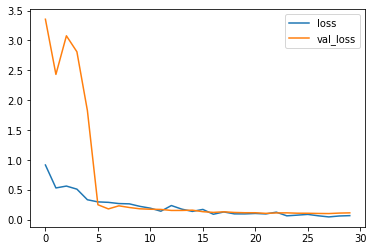

In [22]:
inception = train_model(path, x_train, y_train,
                        x_val, y_val, model_name = "inceptionv3",
                        epochs = 30, input_shape = (image_size,image_size,3),
                        classes = len(classes),
                       callbacks = callbacks)

Epoch 1/30
100/100 [==============================] - 294s 3s/step - loss: 0.6990 - accuracy: 0.7425 - val_loss: 2.0946 - val_accuracy: 0.4096 - lr: 0.0010
Epoch 2/30
100/100 [==============================] - 284s 3s/step - loss: 0.4911 - accuracy: 0.8275 - val_loss: 2.8326 - val_accuracy: 0.1642 - lr: 0.0010
Epoch 3/30
100/100 [==============================] - 283s 3s/step - loss: 0.4997 - accuracy: 0.8248 - val_loss: 1.5985 - val_accuracy: 0.4461 - lr: 0.0010
Epoch 4/30
100/100 [==============================] - 282s 3s/step - loss: 0.4100 - accuracy: 0.8487 - val_loss: 3.5865 - val_accuracy: 0.4959 - lr: 0.0010
Epoch 5/30
100/100 [==============================] - ETA: 0s - loss: 0.4113 - accuracy: 0.8537 
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
100/100 [==============================] - 1745s 18s/step - loss: 0.4113 - accuracy: 0.8537 - val_loss: 1.9968 - val_accuracy: 0.6119 - lr: 0.0010
Epoch 6/30
100/100 [==============================] - 27

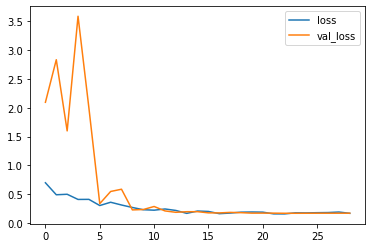

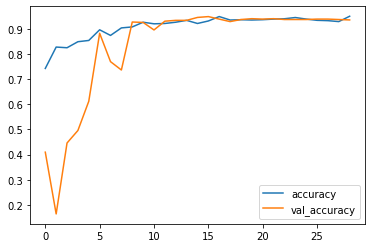

In [27]:
resnet = train_model(path, x_train, y_train,
                     x_val, y_val, model_name="resnet50v2",
                     epochs=30, input_shape = (image_size,image_size,3),
                     classes = len(classes),
                     callbacks = callbacks)

Epoch 1/30
100/100 [==============================] - 182s 2s/step - loss: 0.8065 - accuracy: 0.6913 - val_loss: 2.5938 - val_accuracy: 0.1095 - lr: 0.0010
Epoch 2/30
100/100 [==============================] - 182s 2s/step - loss: 0.5592 - accuracy: 0.7825 - val_loss: 4.8528 - val_accuracy: 0.4461 - lr: 0.0010
Epoch 3/30
100/100 [==============================] - ETA: 0s - loss: 0.6347 - accuracy: 0.7547
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
100/100 [==============================] - 170s 2s/step - loss: 0.6347 - accuracy: 0.7547 - val_loss: 3.0851 - val_accuracy: 0.4461 - lr: 0.0010
Epoch 4/30
100/100 [==============================] - 179s 2s/step - loss: 0.3804 - accuracy: 0.8650 - val_loss: 2.5339 - val_accuracy: 0.4461 - lr: 3.0000e-04
Epoch 5/30
100/100 [==============================] - 182s 2s/step - loss: 0.3670 - accuracy: 0.8562 - val_loss: 3.3371 - val_accuracy: 0.3068 - lr: 3.0000e-04
Epoch 6/30
100/100 [==============================]

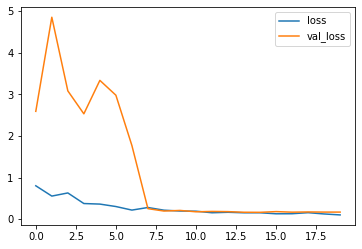

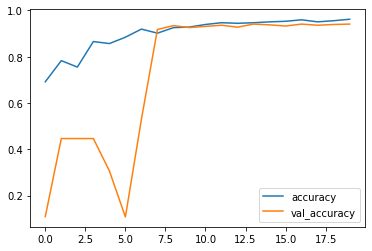

In [10]:
efficientnet = train_model(path, x_train, y_train,
                     x_val, y_val, model_name="efficientnetb0",
                     epochs=30, input_shape = (image_size,image_size,3),
                     classes = len(classes),
                     callbacks = callbacks)

In [6]:
def ensemble(x, weights, models): 
    '''
    returns a weighted average of predictions made by the models\n
    x -> input image \n
    weights -> a list of weights \n
    models -> a list of models\n    
    '''      
    outputs = []    
    for model in models:                
        outputs.append(list(model.predict(x)[0]))                
    
    outputs = np.array(outputs)
    avg = np.average(a=outputs,axis=0,weights=weights)
    return avg


def equal(pred, label):
  pred_id = np.argmax(pred)
  if (pred_id == label):
    return True
  else:
    return False


def accuracy(predicted_values, y_truths):
  '''
  returns accuracy\n
  predicted_values = a numpy array containing the predictions\n
  y_truths = a numpy array containing the truth values\n  
  '''
  total = len(y_truths)
  correct = 0
  for i in range(len(y_truths)):
    if equal(predicted_values[i],y_truths[i]):
      correct += 1
  acc = correct / total
  return acc


def generate_weights(x_val, y_val, models):
    '''
    returns a list of weights
    '''
    accuracy = []
    weights = np.full((1,len(models)), 100.0)
    for model in models:
      acc = model.evaluate(x_val, y_val)[1]
      accuracy.append(100*acc)
    weights = weights - accuracy
    weights = weights**2
    sum = np.sum(weights)
    weights = weights/sum
    weights = 1/weights
    weights = weights**2
    sum = np.sum(weights)
    weights = weights/sum
    return weights

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

inception_path = 'New_Model/inceptionv3.h5'
resnet_path = 'New_Model/resnet50v2.h5'
efficient_path = 'New_Model/efficientnetb0.h5'
xception_path = 'New_Model/xception.h5'
densenet_path = 'New_Model/densenet201.h5'

inception_model = tf.keras.models.load_model(inception_path)
resnet_model = tf.keras.models.load_model(resnet_path)
efficient_model = tf.keras.models.load_model(efficient_path)
xception_model = tf.keras.models.load_model(xception_path)
densenet_model = tf.keras.models.load_model(densenet_path)

models = [inception_model, resnet_model, efficient_model, xception_model, densenet_model]

w = generate_weights(x_test,y_test,models)[0] #generating weights
print("Weights: ", w)

predictions = []
accs = []

for model in models:
    y_preds = (np.array(model.predict(x_test)))
    y_preds = np.argmax(y_preds, axis = 1)
    
    acc = accuracy_score(y_test, y_preds)
    accs.append(100 * acc)
    
print('\n Models Accuracy on test set (inception, resnet, efficient, xception, densenet) : ', accs)

    
for i in range(len(x_test)):
  pred = ensemble(x_test[i].reshape(-1,image_size,image_size,3),w,models)
  predictions.append(pred)

print("Ensemble Accuracy: ",accuracy(predictions,y_test))

y_pred = np.argmax(np.array(predictions), axis=1)

clf_report = classification_report(y_pred=y_pred, y_true=y_test, target_names = ['COVID19 (0)', 'NORMAL (1)', 'PNEUMONIA (2)'])

print("The classification report: ")
print(clf_report)

cf_matrix = confusion_matrix(y_pred=y_pred, y_true=y_test)

print("Confusion Matrix: ")
print(cf_matrix)

10/10 [==============================] - 39s 4s/step - loss: 0.3719 - accuracy: 0.8914
Weights:  [0.2402609  0.29497713 0.13736978 0.29497713 0.03241507]

 Models Accuracy on test set (inception, resnet, efficient, xception, densenet) :  [93.42105263157895, 93.75, 92.43421052631578, 93.75, 89.14473684210526]
Ensemble Accuracy:  0.944078947368421
The classification report: 
               precision    recall  f1-score   support

  COVID19 (0)       0.92      0.97      0.94        34
   NORMAL (1)       0.95      0.93      0.94       135
PNEUMONIA (2)       0.94      0.96      0.95       135

     accuracy                           0.94       304
    macro avg       0.94      0.95      0.94       304
 weighted avg       0.94      0.94      0.94       304

Confusion Matrix: 
[[ 33   0   1]
 [  3 125   7]
 [  0   6 129]]


<AxesSubplot:>

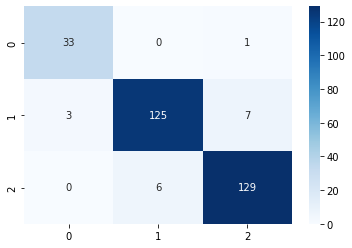

In [13]:
sns.heatmap(cf_matrix, annot = True, cmap='Blues', fmt='g')

In [10]:
total = sum(sum(cf_matrix))

accuracy_covid= (cf_matrix[0,0] + cf_matrix[1,1] + cf_matrix[2,2] + cf_matrix[1,2] + cf_matrix[2,1])/total

sensitivity_covid = cf_matrix[0,0]/ (cf_matrix[0, 0] + cf_matrix[0,1] + cf_matrix[0, 2])

specificity_covid = (cf_matrix[1,1] +cf_matrix[1,2] + cf_matrix[2,1] + cf_matrix[2,2])/(cf_matrix[1,0] + cf_matrix[2,0] + cf_matrix[1,1] +cf_matrix[1,2] + cf_matrix[2,1] + cf_matrix[2,2])

precision_covid = (cf_matrix[0, 0])/(cf_matrix[0, 0]+ cf_matrix[1,0] + cf_matrix[2,0])
f1score_covid = (2 * sensitivity_covid * precision_covid)/(sensitivity_covid + precision_covid)

print("Accuracy of covid: ", accuracy_covid *100)
print("Sensitivity of covid: ", sensitivity_covid * 100)
print("Specificity of covid: ", specificity_covid* 100)
print("Precision of covid : ", precision_covid * 100)
print("F1-Score of covid : ",f1score_covid * 100)

Accuracy of covid:  98.68421052631578
Sensitivity of covid:  97.05882352941177
Specificity of covid:  98.88888888888889
Precision of covid :  91.66666666666666
F1-Score of covid :  94.28571428571428


In [11]:

accuracy_normal= (cf_matrix[1, 1] + cf_matrix[0, 0] + cf_matrix[0,2] + cf_matrix[2,0] + cf_matrix[2,2])/total

sensitivity_normal = cf_matrix[1,1]/ (cf_matrix[1, 1] + cf_matrix[1, 0] + cf_matrix[1, 2])

specificity_normal = (cf_matrix[0, 0] + cf_matrix[0,2] + cf_matrix[2,0] + cf_matrix[2,2])/(cf_matrix[0, 0] + cf_matrix[0,2] + cf_matrix[2,0] + cf_matrix[2,2] + cf_matrix[0,1] + cf_matrix[2,1])

precision_normal = (cf_matrix[1, 1])/(cf_matrix[1, 1]+ cf_matrix[0, 1] + cf_matrix[2, 1])

f1score_normal = (2 * sensitivity_normal * precision_normal)/(sensitivity_normal + precision_normal)

print("Accuracy of normal: ", accuracy_normal *100)
print("Sensitivity of normal: ", sensitivity_normal * 100)
print("Specificity of normal : ", specificity_normal* 100)
print("Precision of normal : ", precision_normal * 100)
print("F1-Score of normal : ",f1score_normal * 100)

Accuracy of normal:  94.73684210526315
Sensitivity of normal:  92.5925925925926
Specificity of normal :  96.44970414201184
Precision of normal :  95.41984732824427
F1-Score of normal :  93.98496240601504


In [12]:
total = sum(sum(cf_matrix))

accuracy_pneumonia= (cf_matrix[2,2] + cf_matrix[0,0] + cf_matrix[0,1] + cf_matrix[1,0] + cf_matrix[1,1])/total

sensitivity_pneumonia = cf_matrix[2,2]/ (cf_matrix[2,2] + cf_matrix[2,0] + cf_matrix[2,1])

specificity_pneumonia = (cf_matrix[0,0] +cf_matrix[0,1] + cf_matrix[1,0] + cf_matrix[1,1])/(cf_matrix[0,0] + cf_matrix[0,1] + cf_matrix[1,0] +cf_matrix[1,1] + cf_matrix[0,2] + cf_matrix[1,2])

precision_pneumonia = (cf_matrix[2,2])/(cf_matrix[2,2]+ cf_matrix[0,2] + cf_matrix[1,2])
f1score_pneumonia = (2 * sensitivity_pneumonia * precision_pneumonia)/(sensitivity_pneumonia + precision_pneumonia)

print("Accuracy of pneumonia: ", accuracy_pneumonia *100)
print("Sensitivity of pneumonia: ", sensitivity_pneumonia * 100)
print("Specificity of penumonia: ", specificity_pneumonia* 100)
print("Precision of pneumonia : ", precision_pneumonia * 100)
print("F1-Score of pneumonia : ",f1score_pneumonia * 100)

Accuracy of pneumonia:  95.39473684210526
Sensitivity of pneumonia:  95.55555555555556
Specificity of penumonia:  95.26627218934911
Precision of pneumonia :  94.16058394160584
F1-Score of pneumonia :  94.8529411764706
